# Survival Rate Prediction DM Final Project

In [1]:
#install pacakage
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pyGRNN import GRNN
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
# load dataset 
df = pd.read_csv("dataset.csv")

In [3]:
# data dimension
df.shape

(91713, 85)

In [4]:
# df head
df.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  ...  \
0  Caucasian      M   180.3                      Floor  ...   
1  Caucasian      F   160.0                      Floor  ...   
2  Caucasian      F   172.7       Accident & Emergency  ...   
3  Caucasian      F   165.1  Operating Room / Recovery  ...   
4  Caucasian      M   188.0       Accident & Emergency  ...   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0                Sepsis       Cardiovascular   
1                          0.0           Respiratory          Respiratory   
2                          0.0             Metabolic            Metabolic   
3                          0.0        Cardiovascular       Cardiovascular   
4                          0.0                Trauma               Trauma   

   Unnamed: 83  hospital_death  
0          NaN               0  
1          NaN               0  
2          NaN               0  
3          NaN               0  
4          NaN               0  

[5 rows x 85 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

# Data Processing

In [6]:
# count missing values by column
dict(df.isna().sum())

{'encounter_id': 0,
 'patient_id': 0,
 'hospital_id': 0,
 'age': 4228,
 'bmi': 3429,
 'elective_surgery': 0,
 'ethnicity': 1395,
 'gender': 25,
 'height': 1334,
 'icu_admit_source': 112,
 'icu_id': 0,
 'icu_stay_type': 0,
 'icu_type': 0,
 'pre_icu_los_days': 0,
 'weight': 2720,
 'apache_2_diagnosis': 1662,
 'apache_3j_diagnosis': 1101,
 'apache_post_operative': 0,
 'arf_apache': 715,
 'gcs_eyes_apache': 1901,
 'gcs_motor_apache': 1901,
 'gcs_unable_apache': 1037,
 'gcs_verbal_apache': 1901,
 'heart_rate_apache': 878,
 'intubated_apache': 715,
 'map_apache': 994,
 'resprate_apache': 1234,
 'temp_apache': 4108,
 'ventilated_apache': 715,
 'd1_diasbp_max': 165,
 'd1_diasbp_min': 165,
 'd1_diasbp_noninvasive_max': 1040,
 'd1_diasbp_noninvasive_min': 1040,
 'd1_heartrate_max': 145,
 'd1_heartrate_min': 145,
 'd1_mbp_max': 220,
 'd1_mbp_min': 220,
 'd1_mbp_noninvasive_max': 1479,
 'd1_mbp_noninvasive_min': 1479,
 'd1_resprate_max': 385,
 'd1_resprate_min': 385,
 'd1_spo2_max': 333,
 'd1_spo2

In [7]:
# check percentage of missing values by column
dict(round(df.isna().sum()/ len(df),2))

{'encounter_id': 0.0,
 'patient_id': 0.0,
 'hospital_id': 0.0,
 'age': 0.05,
 'bmi': 0.04,
 'elective_surgery': 0.0,
 'ethnicity': 0.02,
 'gender': 0.0,
 'height': 0.01,
 'icu_admit_source': 0.0,
 'icu_id': 0.0,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 0.03,
 'apache_2_diagnosis': 0.02,
 'apache_3j_diagnosis': 0.01,
 'apache_post_operative': 0.0,
 'arf_apache': 0.01,
 'gcs_eyes_apache': 0.02,
 'gcs_motor_apache': 0.02,
 'gcs_unable_apache': 0.01,
 'gcs_verbal_apache': 0.02,
 'heart_rate_apache': 0.01,
 'intubated_apache': 0.01,
 'map_apache': 0.01,
 'resprate_apache': 0.01,
 'temp_apache': 0.04,
 'ventilated_apache': 0.01,
 'd1_diasbp_max': 0.0,
 'd1_diasbp_min': 0.0,
 'd1_diasbp_noninvasive_max': 0.01,
 'd1_diasbp_noninvasive_min': 0.01,
 'd1_heartrate_max': 0.0,
 'd1_heartrate_min': 0.0,
 'd1_mbp_max': 0.0,
 'd1_mbp_min': 0.0,
 'd1_mbp_noninvasive_max': 0.02,
 'd1_mbp_noninvasive_min': 0.02,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,
 'd1_s

In [8]:
# number of null columns
L = []
d = dict(df.isna().sum())
for key, value in d.items():
    if value:
        L.append(key)

len(L)

75

In [9]:
# sum of total missing 
df.isna().sum().sum()

288046

### Handle Missing Values
For numeric columns, we impute missing value with interpolation.

<AxesSubplot:>

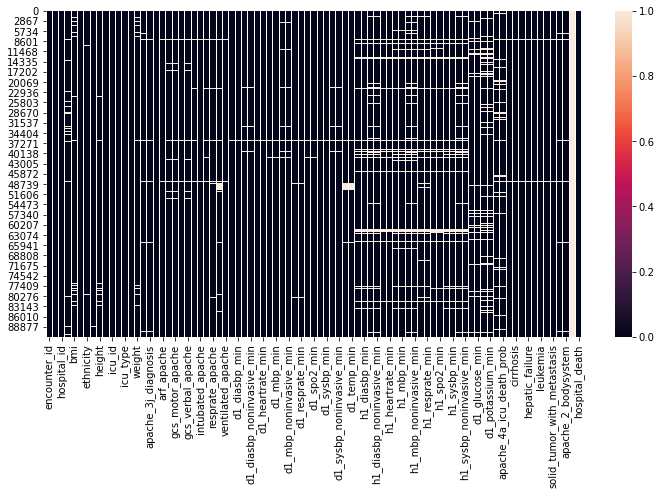

In [10]:
#Heatmap displaying missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [11]:
# drop unmaed column 
df = df.drop("Unnamed: 83",axis=1)

In [12]:
# identify numeric columns
s = (df.dtypes  =="float64")
object_cols = list(s[s].index)

In [13]:
# define function to interpolate value in numeric columns 
def fillin(df):
    for col in object_cols:
        if df[col].isna().sum() != 0:
            df[col] =  df[col].interpolate()
    return df

In [14]:
# impute missing with interpolation
df = fillin(df)

In [15]:
# value count gender 
df.gender.value_counts()

M    49469
F    42219
Name: gender, dtype: int64

In [16]:
#  fill missing value in gender column with M
df['gender'] = df['gender'].fillna('M')
df = df.dropna()

In [17]:
# count missing after cleaning 
df.isna().sum().sum()

0

In [18]:
# shape of cleaned data 
df.shape

(88589, 84)

<AxesSubplot:>

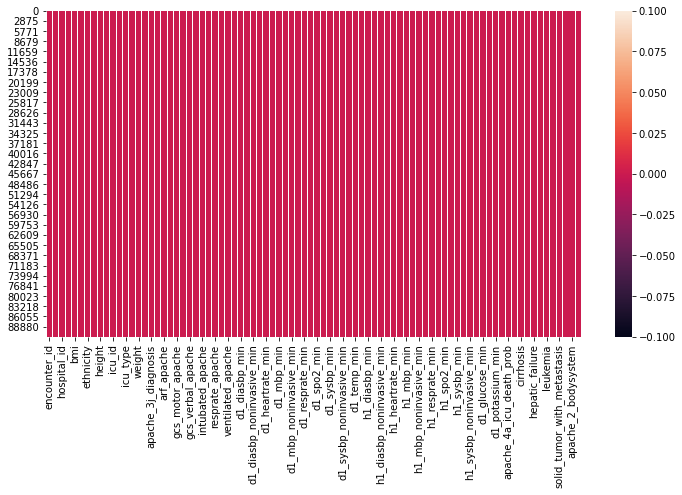

In [19]:
#Check missing value for current data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

# EDA

In [20]:
#Prepare for data profile
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

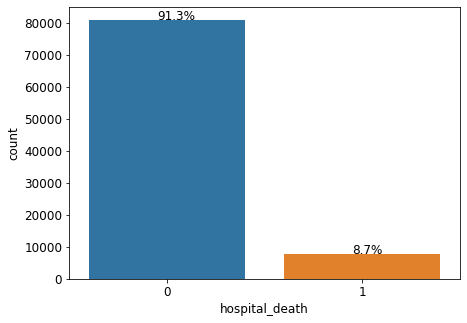

In [21]:
#Plot for response
plt.figure(figsize=(7,5))
ax=sns.countplot('hospital_death', data=df)
plt.xticks(size=12)
plt.xlabel('hospital_death', size=12)
plt.yticks(size=12)
plt.ylabel('count',size=12)

without_hue(ax, df.hospital_death)

In [22]:
# Density Plot of each variable 
unpivot = pd.melt(df, df.describe().columns[0], df.describe().columns[1:])
unpivot

encounter_id        variable    value
0               66154      patient_id  25312.0
1              114252      patient_id  59342.0
2              119783      patient_id  50777.0
3               79267      patient_id  46918.0
4               92056      patient_id  34377.0
...               ...             ...      ...
6732759         91592  hospital_death      0.0
6732760         66119  hospital_death      0.0
6732761          8981  hospital_death      0.0
6732762         33776  hospital_death      0.0
6732763          1671  hospital_death      0.0

[6732764 rows x 3 columns]

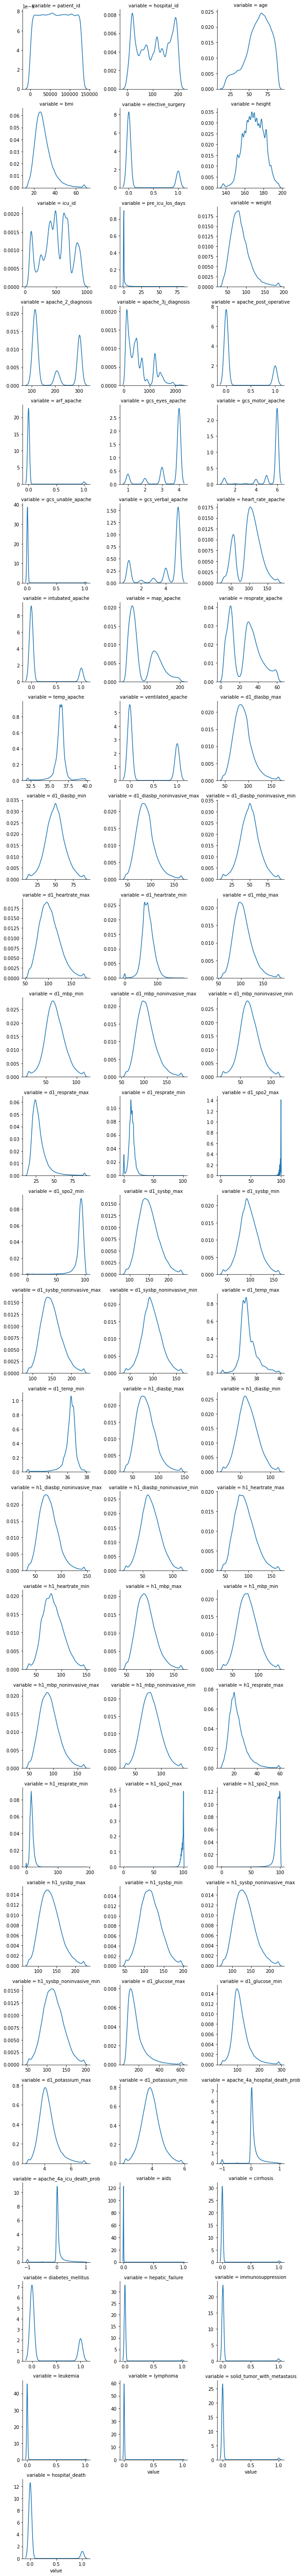

In [23]:
# density plot for each variable 
fig2 = sns.FacetGrid(unpivot, col = 'variable', col_wrap = 3,
                    sharex = False, sharey = False)
fig2.map(sns.kdeplot, "value")
plt.show()

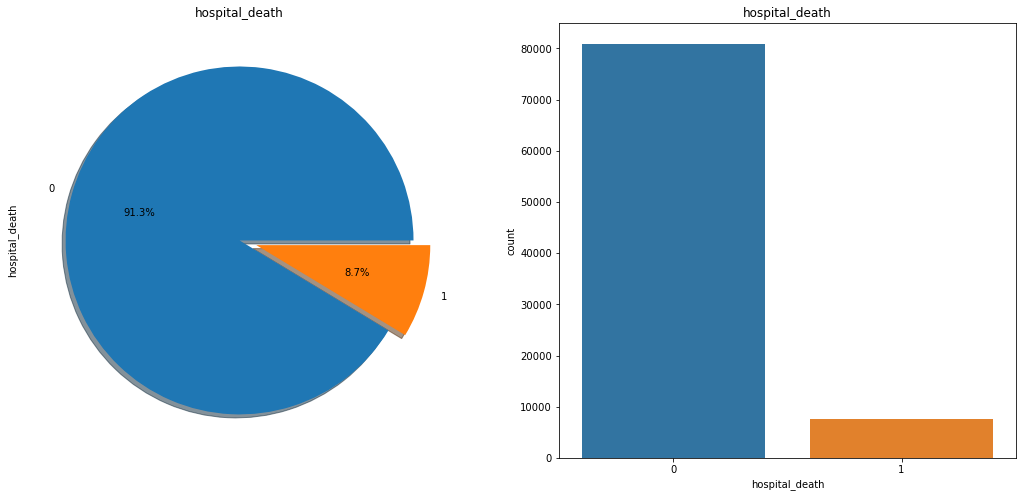

In [24]:
# plot of hospital_death
f,ax=plt.subplots(1,2,figsize=(18,8))
df['hospital_death'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('hospital_death')
sns.countplot('hospital_death',data=df,ax=ax[1])
ax[1].set_title('hospital_death')
plt.show()

In [25]:
# Percentage of dead people by gender 
sub1 = 100 * df.groupby(["gender"])['hospital_death'].sum()/df.gender.value_counts()
# create a sub data frame
sub1 = {'female': sub1[0], 'male': sub1[1]}
sub1 = pd.DataFrame(data=sub1, index = [0])

In [26]:
# Percentage of male who died
sub1 = df.groupby(["gender"])['hospital_death'].sum()[1]/df.gender.value_counts()[0]
# Percentage of female who died
sub2 = df.groupby(["gender"])['hospital_death'].sum()[0]/df.gender.value_counts()[1]

In [27]:
# create a sub data frame
df_gender = {'female': sub2, 'male': sub1}
df_gender = pd.DataFrame(data=df_gender, index = [0])

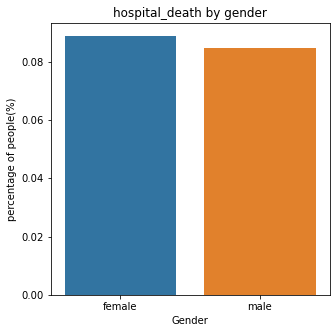

In [28]:
# plot gender by hospital_death
plt.figure(figsize=(5,5))
sns.barplot(data=df_gender).set(xlabel='Gender', ylabel='percentage of people(%)', title = "hospital_death by gender")
plt.show()

In [29]:
age_death_F=df[df['gender']=='F'][['age','hospital_death']].groupby('age').mean().reset_index()
age_death_M=df[df['gender']=='M'][['age','hospital_death']].groupby('age').mean().reset_index()
fig = make_subplots()
fig.add_trace(
    go.Scatter(x=age_death_F['age'], y=age_death_F['hospital_death'], name="Female patients"))
fig.add_trace(
    go.Scatter(x=age_death_M['age'], y=age_death_M['hospital_death'],name="Male patients"))
fig.update_layout(
    title_text="<b>Average hospital death probability of patients<b>")
fig.update_xaxes(title_text="<b>patient age<b>")
fig.update_yaxes(title_text="<b>Average Hospital Death</b>", secondary_y=False)
fig.show()

In [30]:
# plot age distribution for hospital_death according to gender
import plotly.express as px
fig = px.histogram(df[['age', 'gender', 'hospital_death']].dropna(), x= "age", y = "hospital_death", color = 'gender',
                 hover_data = df[['age', 'gender', 'hospital_death']].columns)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()

Text(0.5, 1.0, 'Count of hospital death by count apache 2 diagnosis ')

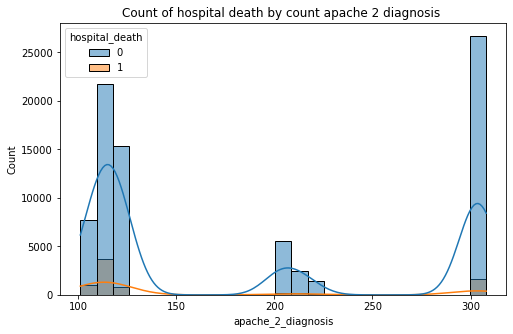

In [31]:
# plot apache_2_diagnosis result for hospital_death 
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = "apache_2_diagnosis", kde = True, hue = "hospital_death")
plt.xlabel('apache_2_diagnosis')
plt.title("Count of hospital death by count apache 2 diagnosis ")

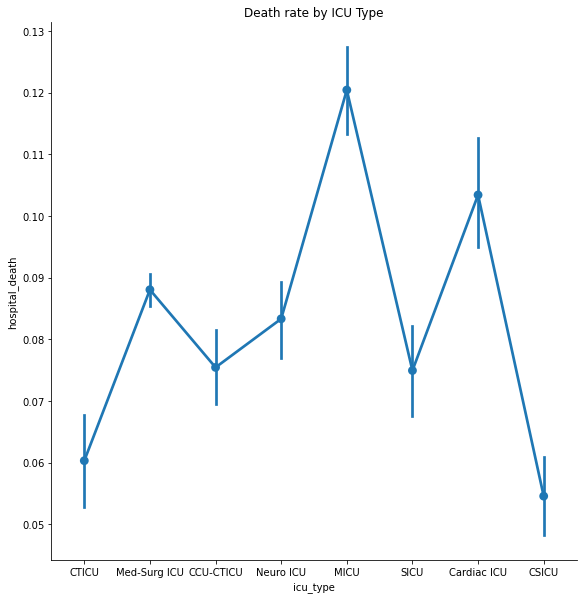

In [32]:
# plot death for ICU type 
sns.factorplot('icu_type','hospital_death',data=df, aspect=1, size = 8)
plt.title("Death rate by ICU Type")
plt.show()

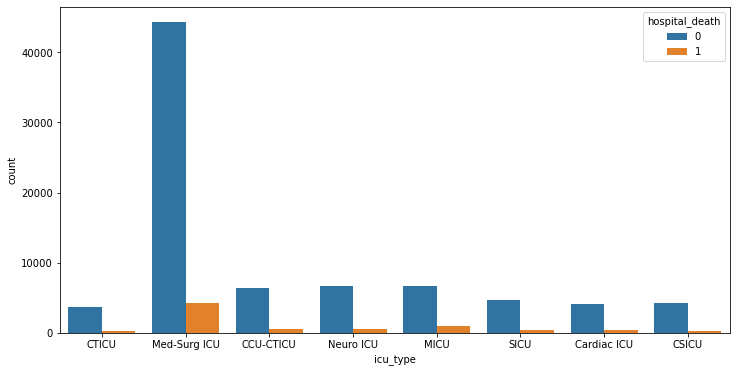

In [33]:
# plot bar chart apache_2_diagnosis result for hospital_death 
plt.figure(figsize=(12,6))
sns.countplot('icu_type',hue='hospital_death',data=df)
plt.show()

In [34]:
#prepare plot for elective surgery
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [35]:
#prepare plot for elective surgery
elective_surgery_0 = df[df['elective_surgery']==0]
elective_surgery_1 = df[df['elective_surgery']==1]

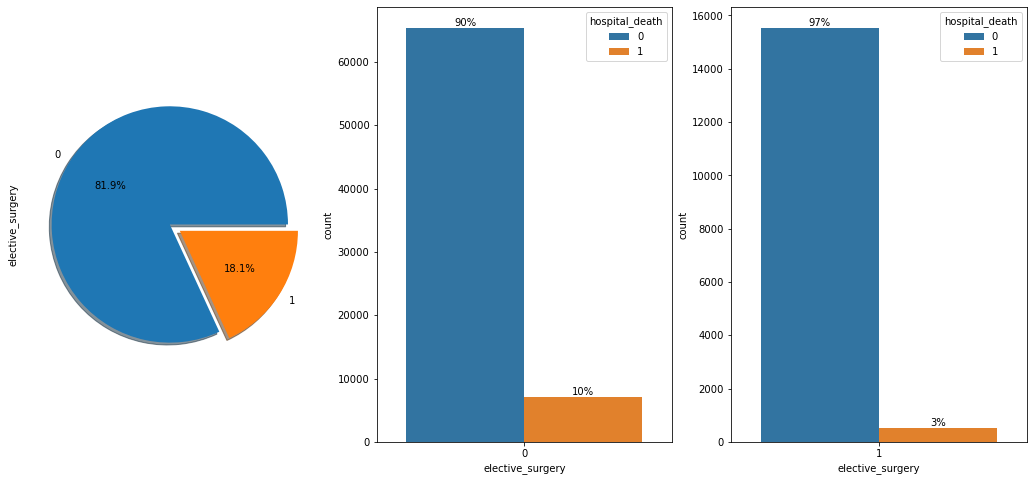

In [36]:
# plot elective surgery to compare hospital_death for patient hospital life because of   
# elective surgery and those are not
f,ax=plt.subplots(1,3,figsize=(18,8))

a = df['elective_surgery'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
b = sns.countplot(x= 'elective_surgery',hue="hospital_death",ax=ax[1],data=elective_surgery_0)
c = sns.countplot(x= 'elective_surgery',hue="hospital_death",ax=ax[2],data=elective_surgery_1)
barPerc(elective_surgery_0,'elective_surgery',b)
barPerc(elective_surgery_1,'elective_surgery',c)

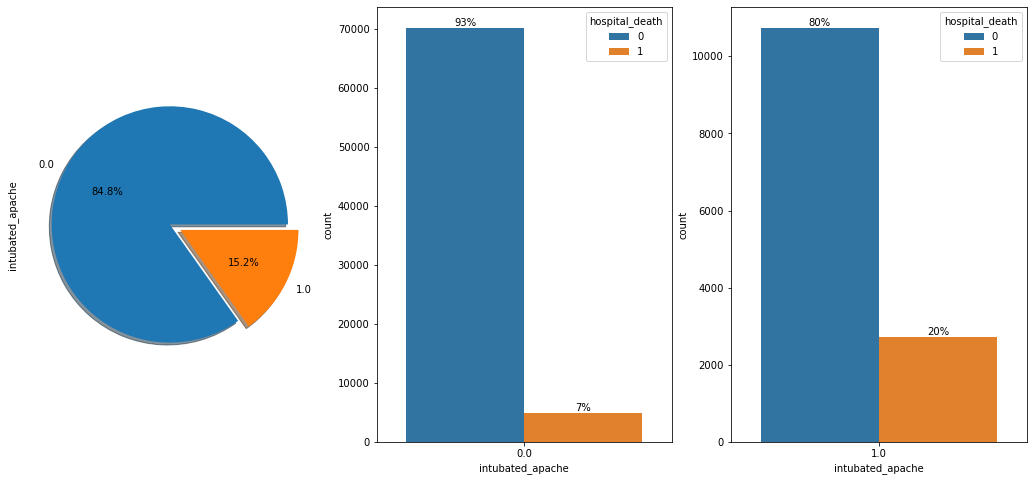

In [37]:
#Similar plot for variable intubated_apache
intubated_apache_0 = df[df['intubated_apache']==0]
intubated_apache_1 = df[df['intubated_apache']==1]
f,ax=plt.subplots(1,3,figsize=(18,8))

a = df['intubated_apache'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
b = sns.countplot(x= 'intubated_apache',hue="hospital_death",ax=ax[1],data=intubated_apache_0)
c = sns.countplot(x= 'intubated_apache',hue="hospital_death",ax=ax[2],data=intubated_apache_1)
barPerc(elective_surgery_0,'elective_surgery',b)
barPerc(elective_surgery_1,'elective_surgery',c)

In [38]:
# correlation matrix to check collinearity
corrMatrix = df.corr()
corrMatrix

encounter_id  patient_id  hospital_id       age  \
encounter_id                     1.000000   -0.008796    -0.004100 -0.004463   
patient_id                      -0.008796    1.000000    -0.007137  0.005682   
hospital_id                     -0.004100   -0.007137     1.000000 -0.008687   
age                             -0.004463    0.005682    -0.008687  1.000000   
bmi                             -0.000358   -0.001963     0.011674 -0.082475   
...                                   ...         ...          ...       ...   
immunosuppression               -0.001988    0.001189     0.000174  0.024915   
leukemia                        -0.002406    0.000537    -0.002734  0.029530   
lymphoma                        -0.000677    0.003104     0.002280  0.023281   
solid_tumor_with_metastasis     -0.005137   -0.003300    -0.004989  0.025218   
hospital_death                  -0.005620    0.004425    -0.001815  0.107402   

                                  bmi  elective_surgery    height    icu_id  \
encounter_id                -0.000358          0.000520 -0.005201 -0.001061   
patient_id                  -0.001963          0.002698  0.002230 -0.001996   
hospital_id                  0.011674          0.055223  0.028280  0.007623   
age                         -0.082475          0.067602 -0.106102 -0.026505   
bmi                          1.000000          0.015102 -0.054137 -0.000627   
...                               ...               ...       ...       ...   
immunosuppression           -0.029172         -0.014703  0.000566 -0.030682   
leukemia                    -0.014263         -0.017289  0.001822  0.001361   
lymphoma                    -0.010686         -0.008722  0.008870 -0.001340   
solid_tumor_with_metastasis -0.042228          0.015374  0.005183 -0.013625   
hospital_death              -0.030229         -0.091322 -0.019924  0.001573   

                             pre_icu_los_days    weight  ...  \
encounter_id                         0.000809 -0.003408  ...   
patient_id                          -0.003230 -0.000500  ...   
hospital_id                         -0.004012  0.025116  ...   
age                                  0.052547 -0.121701  ...   
bmi                                 -0.000811  0.872744  ...   
...                                       ...       ...  ...   
immunosuppression                    0.034976 -0.027845  ...   
leukemia                             0.044404 -0.013378  ...   
lymphoma                             0.015038 -0.005878  ...   
solid_tumor_with_metastasis          0.038971 -0.038058  ...   
hospital_death                       0.065339 -0.037726  ...   

                             apache_4a_icu_death_prob      aids  cirrhosis  \
encounter_id                                 0.000091  0.002607   0.008076   
patient_id                                   0.001803 -0.002055   0.001888   
hospital_id                                  0.002424 -0.004542   0.002583   
age                                          0.076188 -0.029720  -0.028035   
bmi                                         -0.012799 -0.020555  -0.003107   
...                                               ...       ...        ...   
immunosuppression                            0.025074  0.023742  -0.003010   
leukemia                                     0.030639 -0.002502  -0.005429   
lymphoma                                     0.011958  0.021813   0.001536   
solid_tumor_with_metastasis                  0.026523 -0.001617  -0.005896   
hospital_death                               0.288236  0.004545   0.038526   

                             diabetes_mellitus  hepatic_failure  \
encounter_id                          0.003607        -0.000490   
patient_id                            0.000227        -0.001922   
hospital_id                           0.011235         0.000676   
age                                   0.075190        -0.019793   
bmi                                   0.169199        -0.002008   
...        

Text(0.5, 1.0, 'Correlation Matrix Plot')

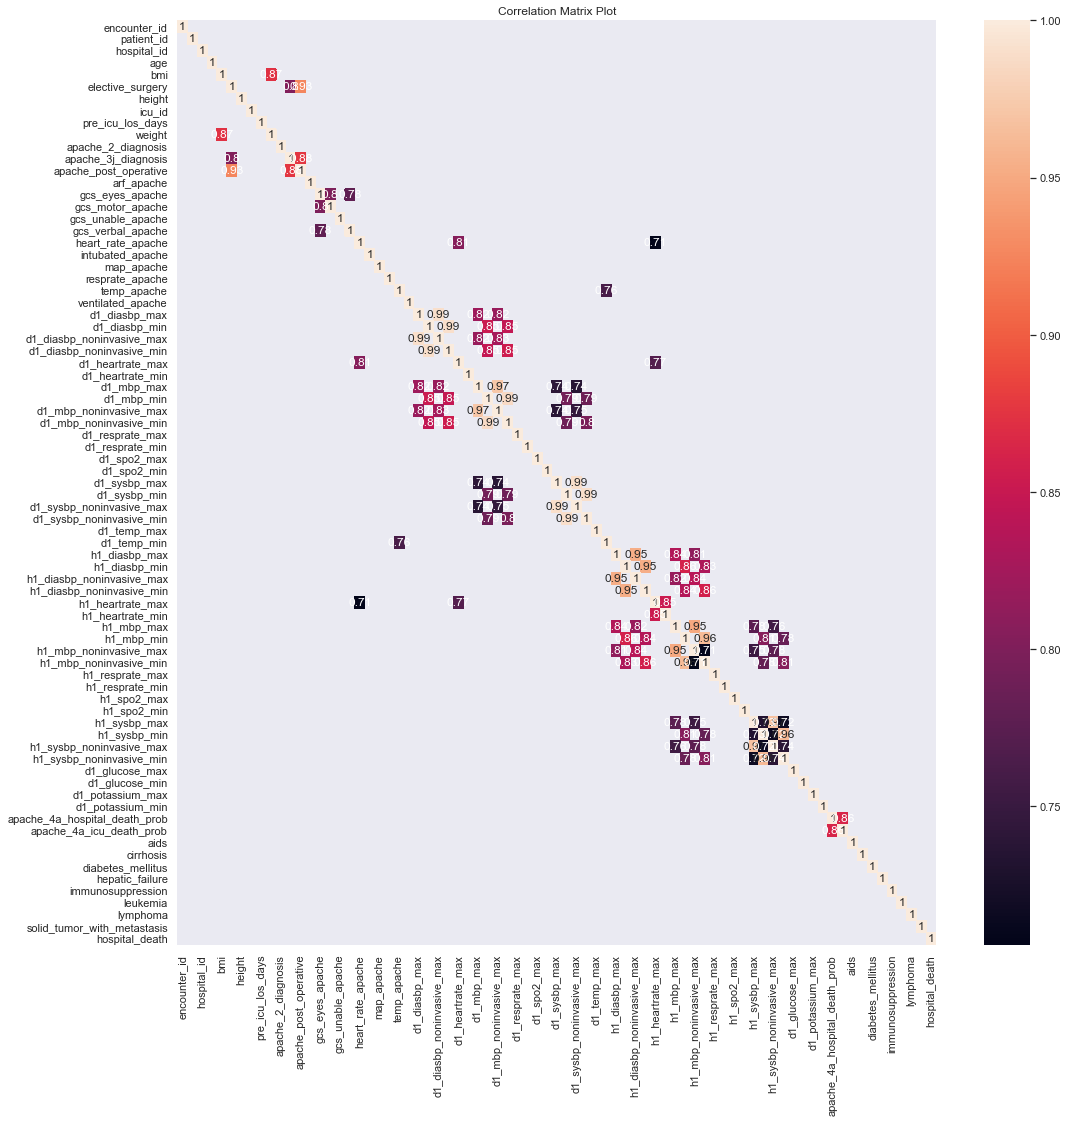

In [39]:
# heatmap displaying correlation Matrix 
sns.set(rc={'figure.figsize':(17,17)})
# show variables with correlation values greater 0.7
sns.heatmap(corrMatrix[corrMatrix > 0.7], annot=True)
plt.title("Correlation Matrix Plot")

### Since there is serious collinearity among variables, so we decide to use PCA to conduct dimension reduction.

# Feature Engineering 

### Encode categorical variables 

In [40]:
# dunmmy code gender
df['gender'] = df['gender'].apply(lambda x:1 if x == "F" else 0)

In [41]:
# one hot encode
df = pd.get_dummies(df)
df.shape

(88589, 121)

### Drop Unnecessnary Columns

In [42]:
df = df.drop(["encounter_id", "patient_id"], axis=1)

### PCA

In [43]:
# Split into two datasets, X with predictors, y with response
X, y = df.drop(['hospital_death'], axis = 1), df['hospital_death']

In [44]:
stscaler = StandardScaler().fit(X)
scaled = stscaler.transform(X)

In [45]:
# we select only 10 componenets 
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

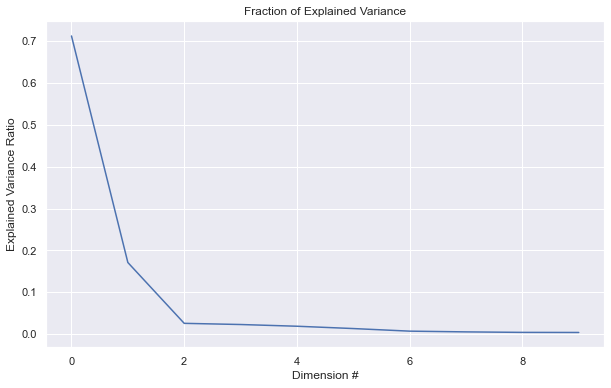

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax.plot(pca.explained_variance_ratio_)

#### From the PCA variance plot, we find that the first two components can explain roughly 85% of response variable. Thus, we decide to use first two componenets (0,1).

In [47]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
pca.components_ = np.array(pca.components_).reshape(118, 10)
Loadings = pd.DataFrame(pca.components_,columns=PCnames,index=X.columns)

# select first 2 components 
Loadings.iloc[:,:2]

PC1       PC2
hospital_id                              4.346235e-03 -0.001999
age                                      9.966379e-01  0.000762
bmi                                     -4.471325e-03 -0.000004
elective_surgery                        -1.624285e-05 -0.006279
gender                                   9.753775e-04  0.000190
...                                               ...       ...
apache_2_bodysystem_Renal/Genitourinary -8.365646e-06 -0.000215
apache_2_bodysystem_Respiratory          2.040916e-05 -0.000032
apache_2_bodysystem_Trauma               3.116297e-07 -0.000074
apache_2_bodysystem_Undefined Diagnoses  3.159674e-04  0.000002
apache_2_bodysystem_Undefined diagnoses -1.175792e-04  0.000316

[118 rows x 2 columns]

<AxesSubplot:>

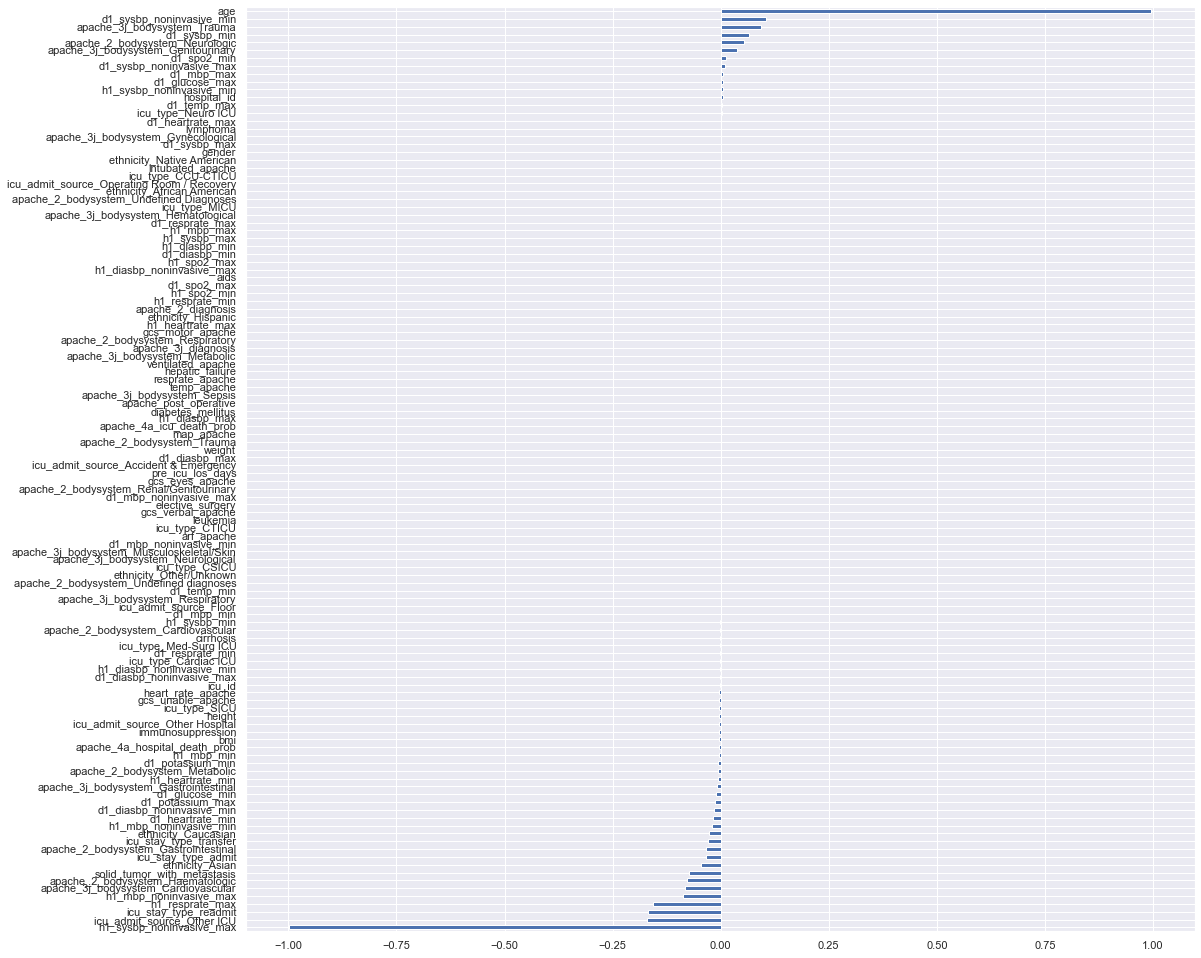

In [48]:
# pca 1 bar plot
Loadings["PC1"].sort_values().plot.barh()

<AxesSubplot:>

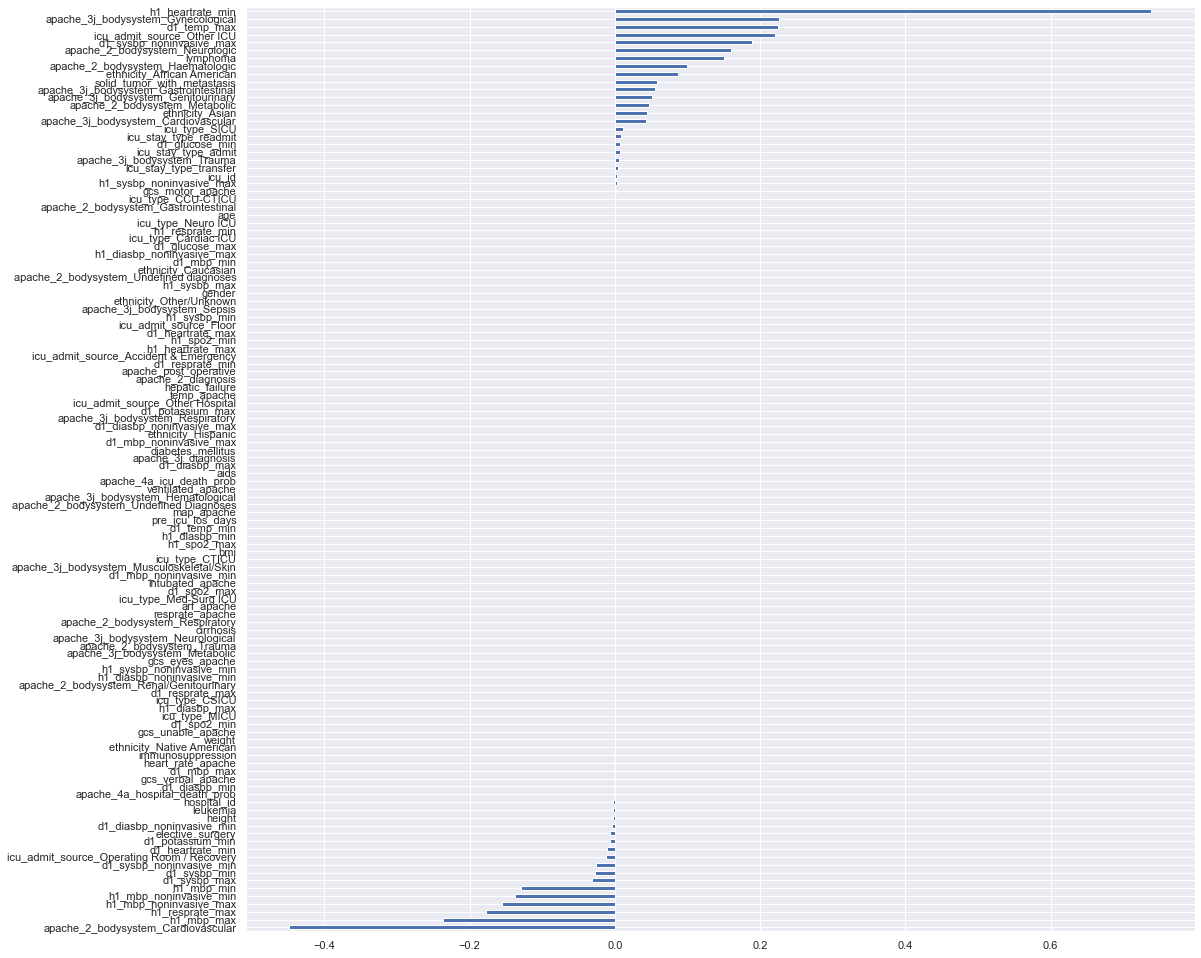

In [49]:
# pca 2 bar plot
Loadings["PC2"].sort_values().plot.barh()

In [50]:
# select important features
X_pca = X[['age', 'apache_3j_bodysystem_Trauma', 'd1_sysbp_noninvasive_min', 'apache_2_bodysystem_Neurologic',
       'apache_3j_bodysystem_Genitourinary', 'd1_spo2_min', 'd1_mbp_max', 'd1_temp_max',
       'd1_glucose_max', 'h1_sysbp_noninvasive_max', 'icu_stay_type_readmit',
       'icu_admit_source_Other ICU', 'h1_resprate_max',
       'apache_3j_bodysystem_Cardiovascular', 'solid_tumor_with_metastasis', 'apache_2_bodysystem_Haematologic',
       'ethnicity_Asian', 'icu_stay_type_admit', 'icu_stay_type_transfer',
       'apache_2_bodysystem_Gastrointestinal',
       'ethnicity_Caucasian', 'd1_heartrate_min',
       'd1_potassium_max',
       'd1_glucose_min', 'h1_mbp_min', 'h1_heartrate_min',
       'apache_3j_bodysystem_Gynecological', 'lymphoma',
       'ethnicity_African American', 'apache_2_bodysystem_Metabolic',
       'icu_type_SICU', 'apache_2_bodysystem_Cardiovascular']]

'd1_sysbp_noninvasive_max', 'd1_sysbp_max', 'h1_mbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'apache_3j_bodysystem_Gastrointestinal,'h1_mbp_noninvasive_min', 'h1_mbp_max',  'd1_sysbp_min'

In [51]:
# number of selected features
len(X_pca.columns)

32

In [52]:
X_pca.columns

Index(['age', 'apache_3j_bodysystem_Trauma', 'd1_sysbp_noninvasive_min',
       'apache_2_bodysystem_Neurologic', 'apache_3j_bodysystem_Genitourinary',
       'd1_spo2_min', 'd1_mbp_max', 'd1_temp_max', 'd1_glucose_max',
       'h1_sysbp_noninvasive_max', 'icu_stay_type_readmit',
       'icu_admit_source_Other ICU', 'h1_resprate_max',
       'apache_3j_bodysystem_Cardiovascular', 'solid_tumor_with_metastasis',
       'apache_2_bodysystem_Haematologic', 'ethnicity_Asian',
       'icu_stay_type_admit', 'icu_stay_type_transfer',
       'apache_2_bodysystem_Gastrointestinal', 'ethnicity_Caucasian',
       'd1_heartrate_min', 'd1_potassium_max', 'd1_glucose_min', 'h1_mbp_min',
       'h1_heartrate_min', 'apache_3j_bodysystem_Gynecological', 'lymphoma',
       'ethnicity_African American', 'apache_2_bodysystem_Metabolic',
       'icu_type_SICU', 'apache_2_bodysystem_Cardiovascular'],
      dtype='object')

In [53]:
# correlation matrix to check collinearity
corrMatrix = X_pca.corr()
corrMatrix

age  apache_3j_bodysystem_Trauma  \
age                                   1.000000                    -0.083086   
apache_3j_bodysystem_Trauma          -0.083086                     1.000000   
d1_sysbp_noninvasive_min             -0.058718                     0.035438   
apache_2_bodysystem_Neurologic       -0.006263                    -0.082700   
apache_3j_bodysystem_Genitourinary   -0.012198                    -0.033211   
d1_spo2_min                          -0.080593                     0.018482   
d1_mbp_max                            0.006076                     0.007857   
d1_temp_max                          -0.079255                     0.049672   
d1_glucose_max                        0.010944                    -0.056753   
h1_sysbp_noninvasive_max              0.044158                     0.036333   
icu_stay_type_readmit                 0.006752                    -0.007123   
icu_admit_source_Other ICU            0.006366                    -0.009104   
h1_resprate_max                       0.025842                    -0.041530   
apache_3j_bodysystem_Cardiovascular   0.139444                    -0.148908   
solid_tumor_with_metastasis           0.025218                    -0.023760   
apache_2_bodysystem_Haematologic     -0.005900                    -0.017948   
ethnicity_Asian                      -0.006110                    -0.005765   
icu_stay_type_admit                   0.007162                    -0.007778   
icu_stay_type_transfer               -0.009882                     0.010658   
apache_2_bodysystem_Gastrointestinal  0.049390                    -0.070553   
ethnicity_Caucasian                   0.136964                     0.022876   
d1_heartrate_min                     -0.139413                    -0.004945   
d1_potassium_max                      0.053787                    -0.018782   
d1_glucose_min                        0.058854                     0.004197   
h1_mbp_min                           -0.101066                     0.022712   
h1_heartrate_min                     -0.157588                    -0.020471   
apache_3j_bodysystem_Gynecological   -0.061493                    -0.012538   
lymphoma                              0.023281                    -0.008512   
ethnicity_African American           -0.120158                    -0.026504   
apache_2_bodysystem_Metabolic        -0.282046                    -0.064180   
icu_type_SICU                         0.005675                     0.054231   
apache_2_bodysystem_Cardiovascular    0.153531                    -0.183662   

                                      d1_sysbp_noninvasive_min  \
age                                                  -0.058718   
apache_3j_bodysystem_Trauma                           0.035438   
d1_sysbp_noninvasive_min                              1.000000   
apache_2_bodysystem_Neurologic                        0.140708   
apache_3j_bodysystem_Genitourinary                   -0.007654   
d1_spo2_min                                           0.223772   
d1_mbp_max                                            0.222383   
d1_temp_max                                          -0.103995   
d1_glucose_max                                       -0.023085   
h1_sysbp_noninvasive_max                              0.440039   
icu_stay_type_readmit                                -0.002198   
icu_admit_source_Other ICU                            0.001952   
h1_resprate_max                                      -0.089148   
apache_3j_bodysystem_Cardiovascular                   0.018319   
solid_tumor_with_metastasis                          -0.022421   
apache_2_bodysystem_Haematologic                      0.000053   
ethnicity_Asian                                       0.000813   
icu_stay_type_admit                                   0.064269   
icu_stay_type_transfer                               -0.066880   
apache_2_bodysystem_Gastrointestinal                 -0.015817   
ethnicity_Caucasian                              

<AxesSubplot:>

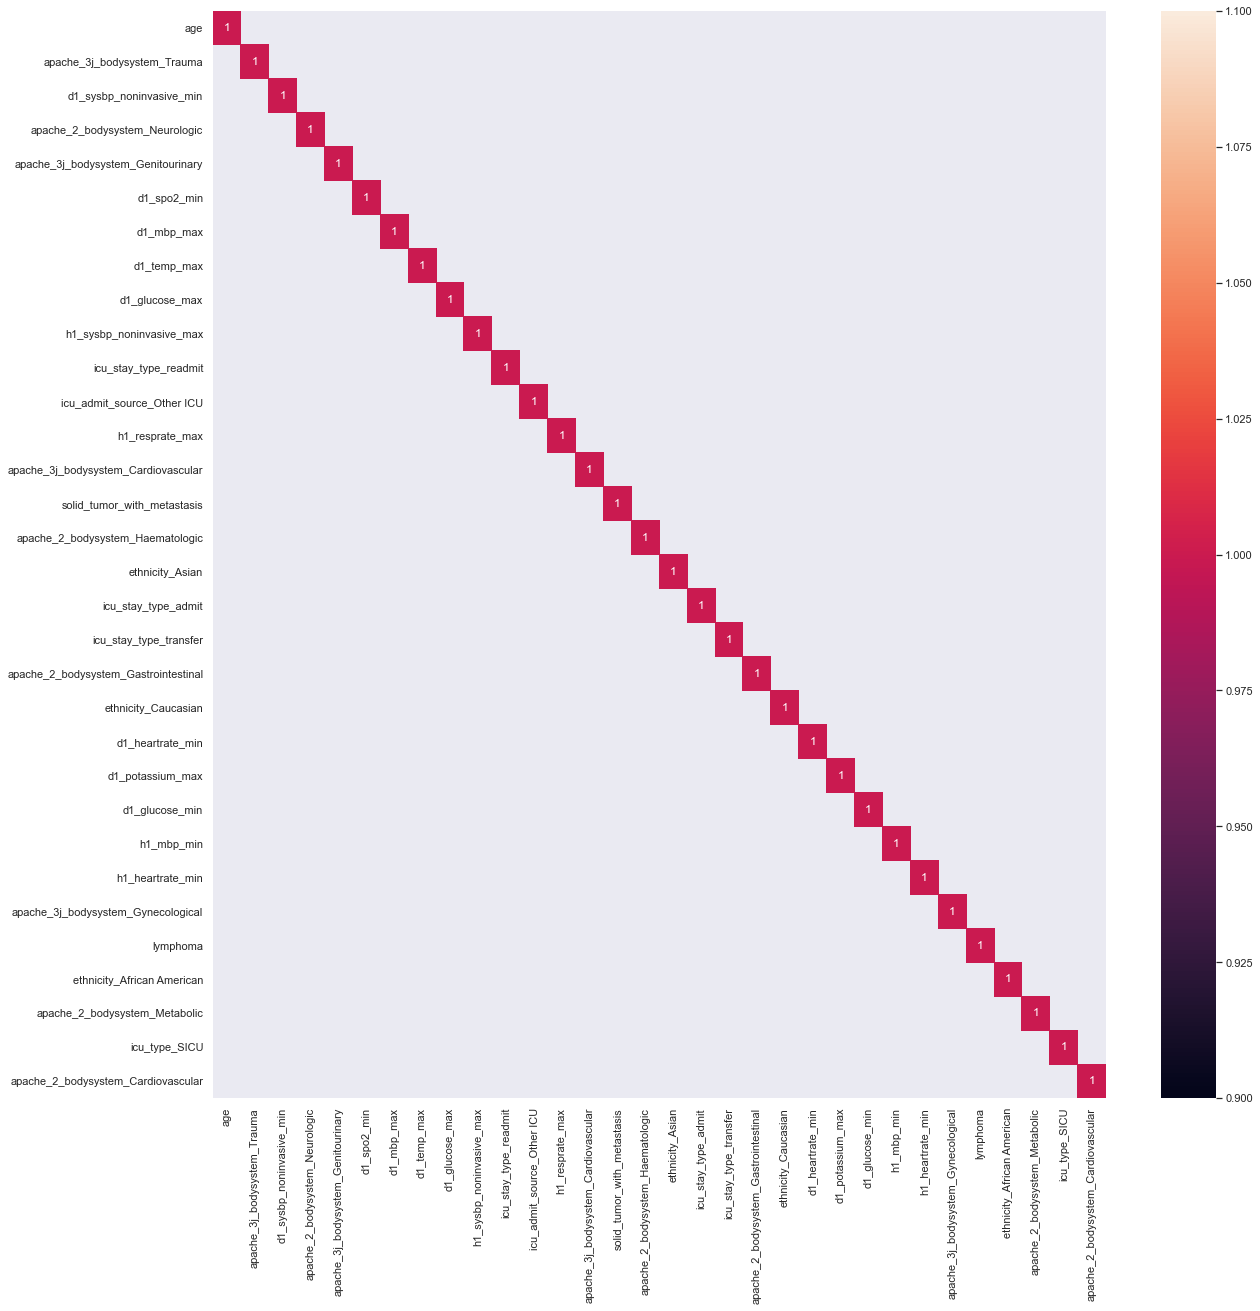

In [54]:
# heatmap displaying correlation Matrix 
sns.set(rc={'figure.figsize':(20,20)})
# show variables with correlation values greater 0.7
sns.heatmap(corrMatrix[corrMatrix > 0.7],annot=True)

#### There is no correlation value greater than 0.7. Thus, there is no multi-collinearity issue.

In [55]:
df_full = pd.concat([X_pca,y], axis=1)

In [56]:
df_full.shape

(88589, 33)

#### Since we still have high collinearity, we deicde to use interaction terms 

### SMOTE Data Oversampling

<AxesSubplot:xlabel='hospital_death', ylabel='Density'>

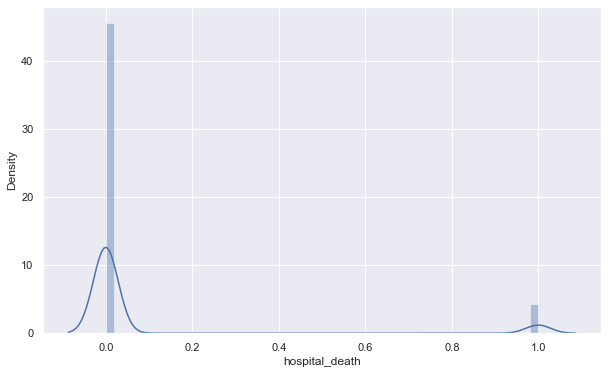

In [57]:
# density plot of hospital_death
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df_full['hospital_death'])

In [58]:
df.hospital_death.value_counts()

0    80922
1     7667
Name: hospital_death, dtype: int64

#### The density plot shows that the target variable "hospital_death" has an uneven distribution of observations. Class 0 has a very high number of observations and Class 1 has a very low number of observations. To deal with the imbalanced data, we will use SMOTE oversampling technique to generate random samples from minority class.

In [59]:
# Split into two datasets, one with predictors, one with response
X, y = df_full.drop(['hospital_death'], axis = 1), df_full['hospital_death']

In [60]:
# SMOTE for data balancing
sm = SMOTE(random_state=12)
X, y = sm.fit_resample(X, y)

In [61]:
# convert y to pd data frame
y = pd.DataFrame(y)

<AxesSubplot:xlabel='hospital_death', ylabel='Density'>

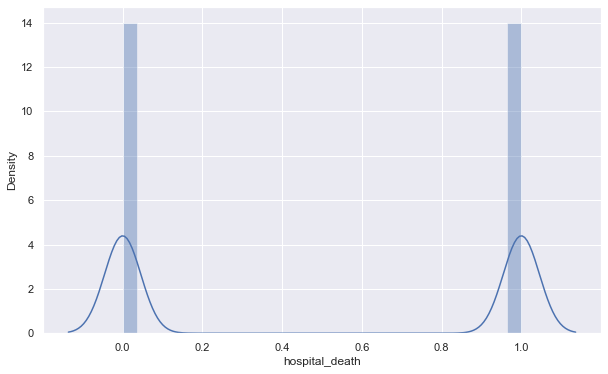

In [62]:
# density plot of hospital_death after balancing 
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(y['hospital_death'])

In [63]:
y.value_counts()

hospital_death
0                 80922
1                 80922
dtype: int64

#### Now, data is balanced

# Models

## 1. Random Forest

In [64]:
# Split PCA data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 12, stratify=y)

In [65]:
# cross validation on pre-PCA training data 
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
# crosss validation accuracy 
cv_rf=np.mean(rf_scores)
cv_rf

0.9345201674019068

In [66]:
# combine X_train and y_train, splitting the whole into trainX and trainy
train = pd.concat([X_train,y_train],axis=1)
trainX, trainy = train.drop(['hospital_death'], axis = 1), train['hospital_death']
# Split pre-PCA training data into training and test
train_X, test_X, train_y, test_y = train_test_split(trainX, trainy, train_size = 0.8, test_size = 0.2, random_state = 12, stratify=trainy)

In [67]:
# comput training accuracy
rf.fit(train_X, train_y)
y_pred = rf.predict(test_X)
tr_rf_accuracy_metric = accuracy_score(y_pred, test_y)
tr_rf_accuracy_metric

0.9310291562077622

In [68]:
## comput test accuracy
te_rf_accuracy_metric=rf.score(X_test, y_test)
te_rf_accuracy_metric

0.9341036176588712

#### Since CV accuracy and training accuracy are roughly equal, and CV accuracy is not smaller than our desired accuracy, which is 85%. Thus, our model does not have either overfit or underfit error. 

In [69]:
rf_imp = rf.feature_importances_
np.sort(rf_imp)[-5:].sum()

0.3856944918405755

Text(0.5, 0.98, 'Important Variables From Random Forest')

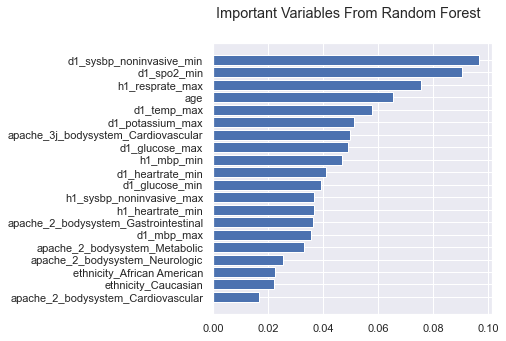

In [70]:
# Top 20 most important features of this model
sorted_idx = rf.feature_importances_.argsort()[-20:]
plt.figure(figsize=(5,5))
plt.barh(train_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.suptitle('Important Variables From Random Forest')
#plt.savefig('rf_importance.png')

## 2. Decision Tree  

In [71]:
# cross validation on post-PCA training data 
dtree = DecisionTreeClassifier()
dtree_scores_pca = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
# crosss validation accuracy 
cv_dt=np.mean(dtree_scores_pca)
cv_dt

0.8800386513167118

In [72]:
# compute training accuracy
d_fit = dtree.fit(train_X, train_y)
y_pred = dtree.predict(test_X)
tr_dt_accuracy_metric = accuracy_score(y_pred, test_y)
tr_dt_accuracy_metric

0.8772349874493145

In [73]:
## comput test accuracy
te_dt_accuracy_metric=dtree.score(X_test, y_test)
te_dt_accuracy_metric

0.8773826809601779

In [74]:
# tree plot
#fig = plt.figure(figsize=(25,20))
#plot_tree(dtree.fit(train_X, train_y), filled=True)
#plt.show()

####  Since CV accuracy and training accuracy are roughly equal, and CV accuracy is not smaller than our desired accuracy, which is 85%. Thus, our model does not have either overfit or underfit error. 

## 3. Logistic Regression

In [75]:
# cross validation on post-PCA training data 
logit = LogisticRegression()
logit_scores_pca = cross_val_score(logit, X_train, y_train, cv=10, scoring='accuracy')
# crosss validation accuracy 
cv_lr=np.mean(logit_scores_pca)
cv_lr

0.7465613062727945

In [76]:
# compute training accuracy
logit.fit(train_X, train_y)
y_pred_pca = logit.predict(test_X)
tr_lr_accuracy_metric = accuracy_score(y_pred_pca, test_y)
tr_lr_accuracy_metric

0.7486001158524812

In [77]:
## comput test accuracy
te_lr_accuracy_metric=logit.score(X_test, y_test)
te_lr_accuracy_metric

0.7467329852636783

#### CV accuracy and training accuracy are roughly equal, and CV accuracy is much smaller than our desired accuracy, which is 85%. Thus, our model has an underfitting issue. 

<Figure size 6400x4800 with 0 Axes>

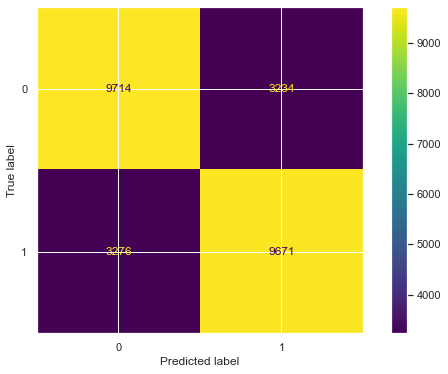

In [78]:
figure(figsize=(80, 60), dpi=80)
plot_confusion_matrix(logit, test_X, test_y) 
plt.show()

#### ROC Curve for logistic regression

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.827


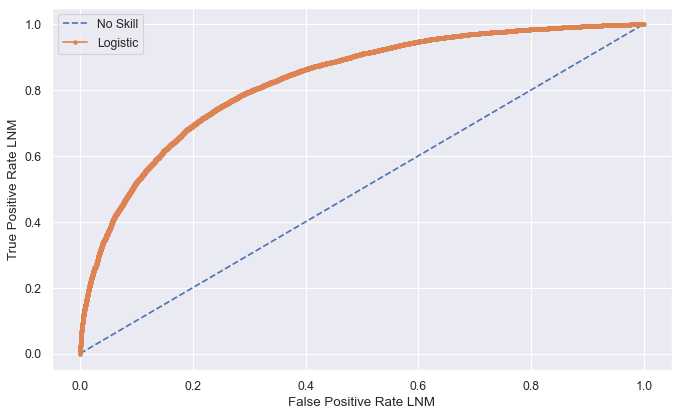

In [79]:
# roc curve and auc
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
logit.fit(X_train, y_train)
# predict probabilities
lr_probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


figure(figsize=(10, 6), dpi=80)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate LNM')
pyplot.ylabel('True Positive Rate LNM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4. K-NN 

In [80]:
# cross validation on post-PCA training data 
knn = KNeighborsClassifier()
knn_scores_pca = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
# crosss validation accuracy 
cv_knn=np.mean(knn_scores_pca)
cv_knn

0.871689547669679

In [81]:
# compute training accuracy
k_fit = knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
tr_knn_accuracy_metric = accuracy_score(y_pred, test_y)
tr_knn_accuracy_metric

0.8673102915620776

In [82]:
#accuracy of our model on the test data
te_knn_accuracy_metric=knn.score(X_test, y_test)
te_knn_accuracy_metric

0.8645926658222374

#### KNN's CV accuracy and training accuracy are roughly equal, and CV accuracy is not smaller than our desired accuracy, which is 85%. Thus, our model does not have either overfit or underfit error. 

## Summary of model performance

In [83]:
## We combined all metrics we have and create a table for model comparison
models = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree','Logistic Regression',
              'KNN'],
    
    '10-Fold CV Accuracy': [cv_rf, cv_dt, 
              cv_lr, cv_knn],
    'Train Accuracy': [tr_rf_accuracy_metric, tr_dt_accuracy_metric, 
              tr_lr_accuracy_metric, tr_knn_accuracy_metric],
    'Test Accuracy': [te_rf_accuracy_metric, te_dt_accuracy_metric, 
              te_lr_accuracy_metric, te_knn_accuracy_metric]
    
    
    })

models.sort_values(by='Train Accuracy', ascending=False)

Model  10-Fold CV Accuracy  Train Accuracy  Test Accuracy
0        Random Forest             0.934520        0.931029       0.934104
1        Decision Tree             0.880039        0.877235       0.877383
3                  KNN             0.871690        0.867310       0.864593
2  Logistic Regression             0.746561        0.748600       0.746733

#### By comparing the results we got from Random Forest, Decision Tree, Logistic Regression and K Neares Neighbor, we conclude that Random Forest delivered the best perfomance among all models we have. Therefore we decide to select  Random Forest as our final model for prediction. 